# Netflix-Top-Rated-Movies-and-TV-Shows 
****Franco Ortiz**** : Data scientist
- [Linkedin](https://www.linkedin.com/in/ortizfranco-/)
- [GitHub](https://github.com/ortizfram)
### Problem Statement
##### Questions to answer
- Which are the best movies released in each year ?*
- What are the most seen genres per year ?*
- Show top longest movies ,are them the most liked?*
- Most running shows, and most polular with just 1 season
- Most liked actor/actress
- ...

# Feature information

File: raw_titles.csv

<img src="img/Screenshot_1.png" width=500px>

File: Best Shows Netflix.csv

<img src="img/Screenshot_2.png" width=500px>

---

# Data importing
#### Modules

In [29]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np

#### Reading files

In [2]:
# Adding path for datasets
p_BMbY = 'data/BMbY.csv' # best movies by year
p_BM = 'data/BM.csv' # best movies
p_BSbY = 'data/BSbY.csv' #best shows by year
p_BS = 'data/BS.csv'
p_raw_creds = 'data/raw_credits.csv'
p_raw_titles = 'data/raw_titles.csv'

In [3]:
BMbY = pd.read_csv(p_BMbY, index_col=False)
BM = pd.read_csv(p_BM, index_col=False)
BSbY = pd.read_csv(p_BSbY, index_col=False)
BS = pd.read_csv(p_BS, index_col=False)
raw_creds = pd.read_csv(p_raw_creds, index_col=False)
raw_titles = pd.read_csv(p_raw_titles, index_col=False)

In [4]:
print('BMbY','\n',BMbY.head(1))
print('BM','\n',BM.head(1))
print('BSbY','\n',BSbY.head(1))
print('BS','\n',BS.head(1))
print('raw_creds','\n',raw_creds.head(1))
print('raw_titles','\n',raw_titles.head(1))

BMbY 
    index            TITLE  RELEASE_YEAR  SCORE MAIN_GENRE MAIN_PRODUCTION
0      0  White Christmas          1954    7.5    romance              US
BM 
    index                                     TITLE  RELEASE_YEAR  SCORE  \
0      0  David Attenborough: A Life on Our Planet          2020    9.0   

   NUMBER_OF_VOTES  DURATION   MAIN_GENRE MAIN_PRODUCTION  
0            31180        83  documentary              GB  
BSbY 
    index                         TITLE  RELEASE_YEAR  SCORE  \
0      0  Monty Python's Flying Circus          1969    8.8   

   NUMBER_OF_SEASONS MAIN_GENRE MAIN_PRODUCTION  
0                  4     comedy              GB  
BS 
    index         TITLE  RELEASE_YEAR  SCORE  NUMBER_OF_VOTES  DURATION  \
0      0  Breaking Bad          2008    9.5          1727694        48   

   NUMBER_OF_SEASONS MAIN_GENRE MAIN_PRODUCTION  
0                  5      drama              US  
raw_creds 
    index  person_id       id            name      character   role
0 

#

# Data Cleaning
##### removing null rows
##### index column is completely unnecessary, we must remove it

In [5]:
datasets = [BMbY, BM, BSbY, BS]

# use a copy of the df to prevent NoneType AttributeError:
remove_null_rows = lambda x: x.dropna(axis=0).copy()
tables = list(map(remove_null_rows, datasets))

# Removing index column
remove_index = lambda x: x.drop(columns=['index'], axis=1, inplace=True)
datasets = list(map(remove_index, datasets))

In [6]:
print('BMbY','\n',BMbY.sample(3))
print('--'*40)
print('BM','\n',BM.sample(3))
print('--'*40)
print('BSbY','\n',BSbY.sample(3))
print('--'*40)
print('BS','\n',BS.sample(3))
print('--'*40)
print('raw_creds','\n',raw_creds.sample(3))
print('--'*40)
print('raw_titles','\n',raw_titles.head(3))

BMbY 
                 TITLE  RELEASE_YEAR  SCORE MAIN_GENRE MAIN_PRODUCTION
10              Annie          1982    6.6      drama              US
39               Rush          2013    8.1      drama              US
25  Girl, Interrupted          1999    7.3      drama              US
--------------------------------------------------------------------------------
BM 
                                        TITLE  RELEASE_YEAR  SCORE  \
79   Monty Python Live at the Hollywood Bowl          1982    7.9   
34                                     Udaan          2010    8.1   
319                                    Blade          1998    7.1   

     NUMBER_OF_VOTES  DURATION MAIN_GENRE MAIN_PRODUCTION  
79             15186        77     comedy              GB  
34             44556       138      drama              IN  
319           267181       120     action              US  
--------------------------------------------------------------------------------
BSbY 
               TITLE  R

# EDA

### Which are the best movies released in each year 

In [7]:
BMbY.columns

Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'MAIN_GENRE', 'MAIN_PRODUCTION'], dtype='object')

In [8]:
release_years = BMbY['RELEASE_YEAR'].unique()

results = [] # to then pass it as DataFrame
for year in release_years:
    filtered_df = BMbY[BMbY["RELEASE_YEAR"] == year] #one movie per year
    max_score = filtered_df["SCORE"].max()
    title = filtered_df[filtered_df["SCORE"] == max_score][["SCORE","RELEASE_YEAR","TITLE"]]
    
    results.append([max_score, year, title.TITLE.values[0]])
    
results_df = pd.DataFrame(results, columns=['SCORE', 'RELEASE_YEAR', 'TITLE'])
results_df

,SCORE,RELEASE_YEAR,TITLE
0,7.5,1954,White Christmas
1,7.5,1961,The Guns of Navarone
2,7.8,1964,My Fair Lady
3,7.7,1967,Bonnie and Clyde
4,7.7,1971,Dirty Harry
5,8.1,1973,The Exorcist
6,8.2,1975,Monty Python and the Holy Grail
7,8.3,1976,Taxi Driver
8,8.0,1979,Life of Brian
9,5.8,1980,The Blue Lagoon


### What are the most seen genres per year ?

In [9]:
BM.columns

Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION',
       'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')

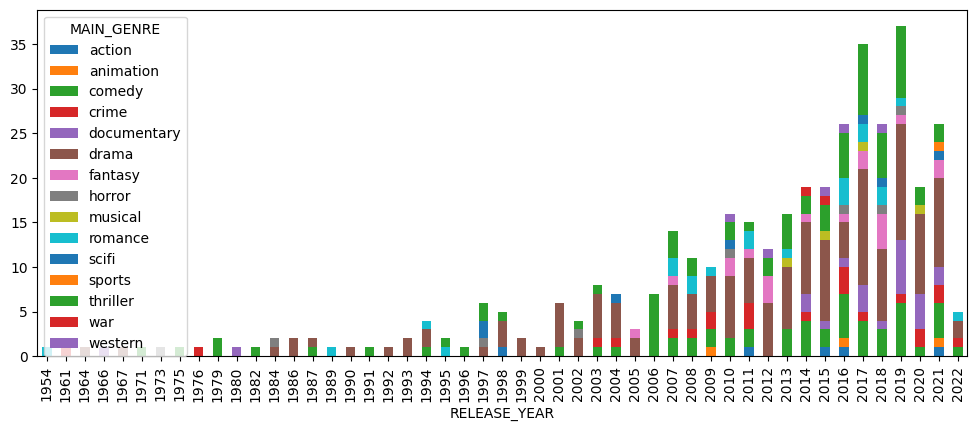

In [10]:
# pass to categorical variable
BM['MAIN_GENRE'] = pd.Categorical(BM['MAIN_GENRE'])

BM_plot = BM.groupby(['RELEASE_YEAR', 'MAIN_GENRE'])['MAIN_GENRE'].count().unstack().fillna(0)
BM_plot.plot(kind='bar', stacked=True, figsize=(12,4.5))
plt.show()

### Show top longest movies

In [11]:
BM.columns

Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION',
       'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')

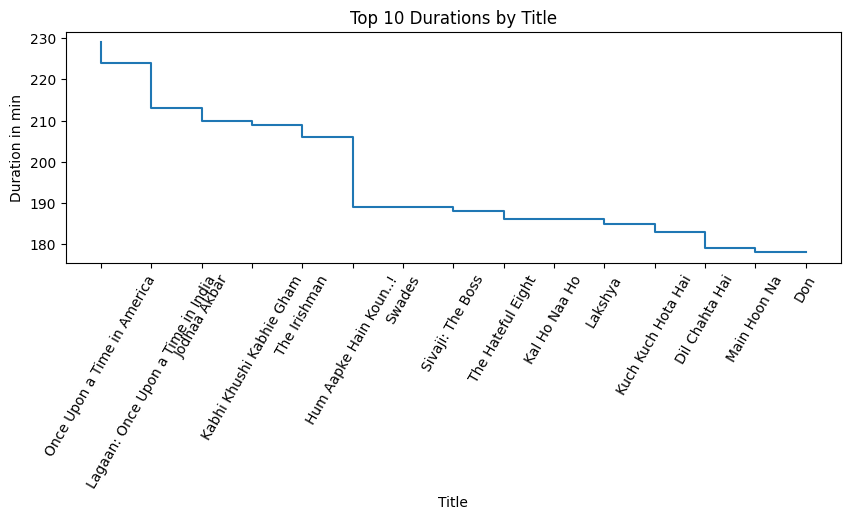

In [24]:
top_10_durations = BM.sort_values("DURATION", ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10, 3))
ax.step(top_10_durations['TITLE'], top_10_durations['DURATION'])
ax.set_xlabel("Title")
ax.set_ylabel("Duration in min")
ax.set_title("Top 10 Durations by Title")
plt.xticks(rotation=60)
plt.show()

### Are them the most liked ones?

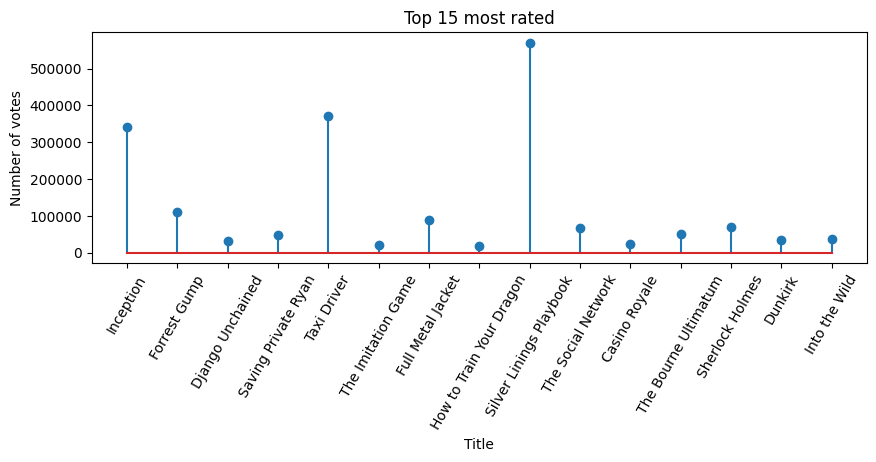

In [37]:
top_15_votes = BM.sort_values("NUMBER_OF_VOTES", ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10, 3))
ax.stem(top_15_votes['TITLE'], top_10_durations['NUMBER_OF_VOTES'])
ax.set_xlabel("Title")
ax.set_ylabel("Number of votes")
ax.set_title("Top 15 most rated")
plt.xticks(rotation=60)
plt.show()

##### FALSE, most liked ones and their DURATIONs are: 

In [68]:
most_rated = ["Inception", "Forrest Gump", "Django Unchained"]

top3_most_rated_duration = lambda df: [print(f"{row['TITLE']} - {row['DURATION']} minutes") for i, row in df.iterrows() if row['TITLE'] in most_rated]

_ = top3_most_rated_duration(BM) # to remove None's

Inception - 148 minutes
Forrest Gump - 142 minutes
Django Unchained - 165 minutes


### List of Series with longer Number of seasons

In [71]:
BS.columns

Index(['TITLE', 'RELEASE_YEAR', 'SCORE', 'NUMBER_OF_VOTES', 'DURATION',
       'NUMBER_OF_SEASONS', 'MAIN_GENRE', 'MAIN_PRODUCTION'],
      dtype='object')

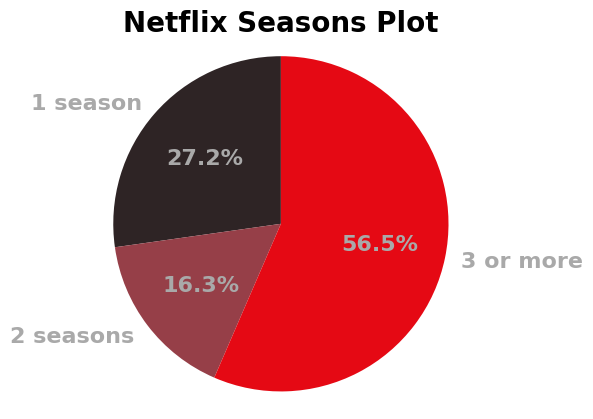

In [125]:
# Pie plot of seasons

# Filter data into separate dataframes
one_s =  BS[BS['NUMBER_OF_SEASONS'] <= 1]
two_s = BS[BS['NUMBER_OF_SEASONS'] == 2]
three_more_s = BS[BS['NUMBER_OF_SEASONS'] >= 3]

# define sizes al labels
sizes = [len(one_s), len(two_s), len(three_more_s)]
labels = ['1 season', '2 seasons', '3 or more']

# Netflix color palette
netflix_palette = ['#2e2425', '#963f48', '#E50914']

# plot config and plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
        startangle=90, # autopct :  provides the format for the percentage 
        colors=netflix_palette,
        textprops={'color':'darkgrey', 'fontsize':16, 'fontweight':'bold'}
       ) 
ax.set_facecolor('black')
plt.axis('equal')
plt.title("Netflix Seasons Plot", fontsize=20, fontweight='bold', color='black')
plt.show()

### Top 10 Longest Running Shows
- a plot for all shows and number of seasons,
- a plot for shows with just 1 seasons and his votes 

C:\Users\ortiz\AppData\Local\Temp\ipykernel_7588\466656874.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(select_cols["TITLE"], rotation=90)
C:\Users\ortiz\AppData\Local\Temp\ipykernel_7588\466656874.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(one_s_cols["TITLE"], rotation=90)


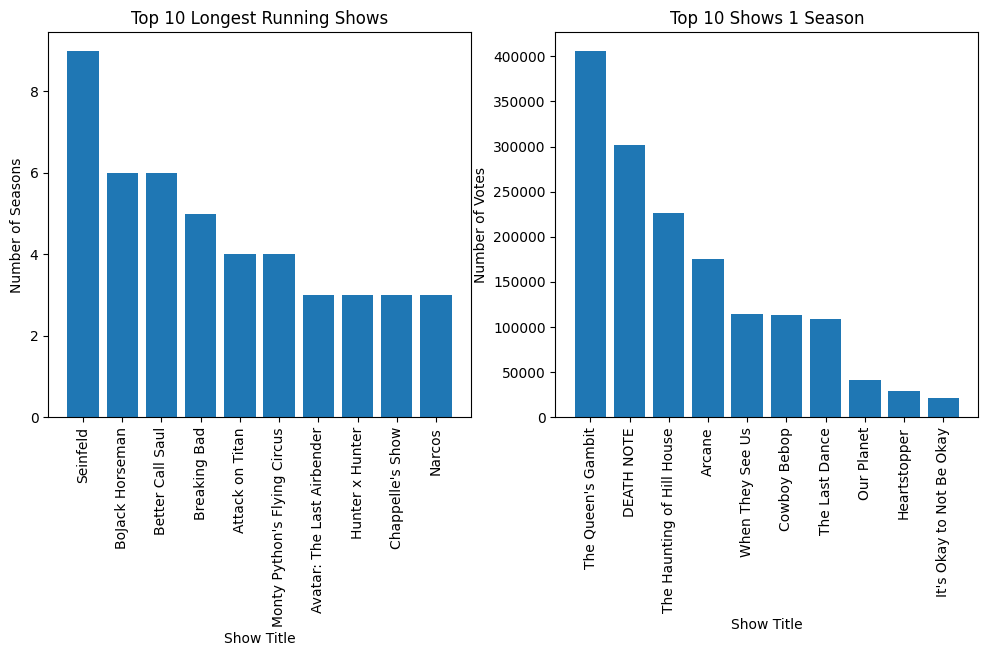

In [177]:
## 1st plot selection face
# Get the top 10 longest running shows
top10_longest_s = three_more_s.head(10).sort_values(by='NUMBER_OF_SEASONS', ascending=False)
# Select the columns you want, and reset the index
select_cols = top10_longest_s[["TITLE","NUMBER_OF_SEASONS"]].reset_index(drop=True)


## 2nd plot selection face
# Get the shows with 1 season
only_one_s =  one_s.head(10).sort_values(by='NUMBER_OF_VOTES', ascending=False) # variables used above one_s
# Select the columns you want, and reset the index
one_s_cols = only_one_s[["TITLE","NUMBER_OF_VOTES"]].reset_index(drop=True)



# Create a figure and set of subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))


# Plot the data for top 10 longest running shows
ax[0].bar(select_cols["TITLE"], select_cols["NUMBER_OF_SEASONS"])
# Add the title
ax[0].set_title("Top 10 Longest Running Shows")
# Add x and y axis labels
ax[0].set_xlabel("Show Title")
ax[0].set_ylabel("Number of Seasons")
# Rotate the x-axis labels to make them readable
ax[0].set_xticklabels(select_cols["TITLE"], rotation=90)


# Plot the data for shows with 1 season
ax[1].bar(one_s_cols["TITLE"], one_s_cols["NUMBER_OF_VOTES"])
# Add the title
ax[1].set_title("Top 10 Shows 1 Season")
# Add x and y axis labels
ax[1].set_xlabel("Show Title")
ax[1].set_ylabel("Number of Votes")
# Rotate the x-axis labels to make them readable
ax[1].set_xticklabels(one_s_cols["TITLE"], rotation=90)


plt.show()